# Generating spectrograms from audio files

In [1]:
from transformers import WhisperFeatureExtractor
import librosa
import matplotlib.pyplot as plt
import subprocess

In [2]:
import subprocess


def convert_opus_to_wav(opus_path, wav_path, path_to_ffmpeg):
    '''This function converts an opus file to a wav file.
    opus_path: path to the opus file
    wav_path: path to the wav file
    path_to_ffmpeg: path to the ffmpeg executable'''

    result = subprocess.run([f'{path_to_ffmpeg}', '-i', f'{opus_file}', '-vn', f'{wav_file}'])

    # Check the exit code
    if result.returncode == 0:
        print('Conversion successful')
    else:
        print('Conversion failed')

In [3]:
path = "D:/Documents/Data_Science/MDS_CL/Term2/Block6/COLX_585_trends_in_computational_linguistics/Team_project/data/"
name = 'common_voice_en_18738928.opus'
opus_file = path  + name
wav_file = path  + name[:-5] + '.wav'
print(opus_file)
print(wav_file)
path_to_ffmpeg = 'C:\Program Files\\ffmpeg\\ffmpeg-2023-04-06-git-b564ad8eac-full_build\\bin/ffmpeg.exe'

D:/Documents/Data_Science/MDS_CL/Term2/Block6/COLX_585_trends_in_computational_linguistics/Team_project/data/common_voice_en_18738928.opus
D:/Documents/Data_Science/MDS_CL/Term2/Block6/COLX_585_trends_in_computational_linguistics/Team_project/data/common_voice_en_18738928.wav


In [4]:
convert_opus_to_wav(opus_file, wav_file, path_to_ffmpeg)

Conversion successful


In [5]:
def generate_spectrogram(file, size):
    '''This function takes in a file path and a size and returns a spectrogram of the audio file.
    file: path to the audio file (wav)
    size: a tuple, size of the spectrogram (height, width)'''
    audio, sr = librosa.load(file, sr=16000) # load audio file
    feature_extractor = WhisperFeatureExtractor() # initialize feature extractor
    features = feature_extractor(audio, sampling_rate=sr, return_tensors="pt") # extract features
    spectrogram = features['input_features'][0] # get spectrogram
    spectrogram = spectrogram[:size[0], :size[1]] # crop spectrogram
    return spectrogram

In [6]:
path_wav = "D:/Documents/Data_Science/MDS_CL/Term2/Block6/COLX_585_trends_in_computational_linguistics/Team_project/data/common_voice_en_18738928.wav"
s = generate_spectrogram(path_wav, (49, 40))

In [7]:
def plot_spectrogram(spectrogram):
    '''This function takes in a spectrogram and plots it.'''
    plt.imshow(spectrogram, aspect='auto', origin='lower')
    plt.colorbar()
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    plt.show()

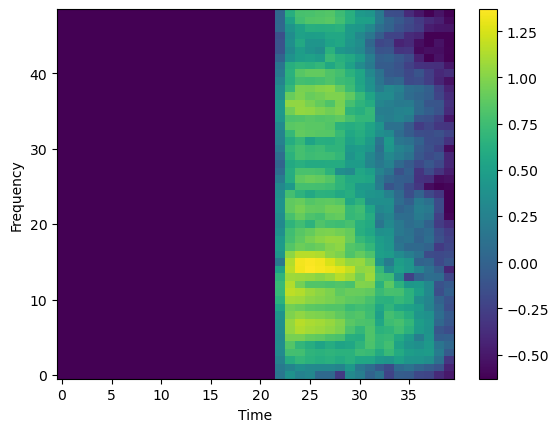

In [8]:
plot_spectrogram(s)